# Tianyi Zhang 9598110243
------------------

## 1. Generative Models for Text

### a)

### b)

### c)

#### 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '../data/Book Files/books'

In [3]:
files = os.listdir(data_folder)

output = open('corpus.txt', 'w')
for item in files:
    with open(os.path.join(data_folder, item), 'r', encoding='ascii', errors='ignore') as datastream:
        for line in datastream:
            output.write(line)

output.close()

In [4]:
print(len(open('corpus.txt', 'r').read()))

5095252


#### 2)

In [2]:
from sklearn.preprocessing import MinMaxScaler
import string

In [7]:
corpus = open('corpus.txt', 'r').read()

#disregard lowercase and uppercase letters and remove punctuation characters
text = corpus.lower()
charSet = set(text)

charSet = charSet.difference(set(string.punctuation))
text = text.translate(str.maketrans('', '', string.punctuation))

print(charSet)
print(len(charSet))

{'w', 'b', 'l', '3', ' ', 'u', 'z', '7', 'm', '5', 'a', 'h', 'n', 'f', 'x', '6', 'p', 'c', 'q', '8', 'y', '9', 'g', 'v', '0', 'r', 'k', 't', 'i', '\n', 'o', '1', 'e', '2', 's', '4', 'j', 'd'}
38


In [8]:
labels = {}
for index, char in enumerate(sorted(charSet)):
    labels[char] = index

print(sorted(labels.items()))
print(len(labels))

[('\n', 0), (' ', 1), ('0', 2), ('1', 3), ('2', 4), ('3', 5), ('4', 6), ('5', 7), ('6', 8), ('7', 9), ('8', 10), ('9', 11), ('a', 12), ('b', 13), ('c', 14), ('d', 15), ('e', 16), ('f', 17), ('g', 18), ('h', 19), ('i', 20), ('j', 21), ('k', 22), ('l', 23), ('m', 24), ('n', 25), ('o', 26), ('p', 27), ('q', 28), ('r', 29), ('s', 30), ('t', 31), ('u', 32), ('v', 33), ('w', 34), ('x', 35), ('y', 36), ('z', 37)]
38


In [9]:
asciiText = {}
for char in charSet:
    asciiText[char] = ord(char)

print(sorted(asciiText.items()))
print(len(asciiText))

[('\n', 10), (' ', 32), ('0', 48), ('1', 49), ('2', 50), ('3', 51), ('4', 52), ('5', 53), ('6', 54), ('7', 55), ('8', 56), ('9', 57), ('a', 97), ('b', 98), ('c', 99), ('d', 100), ('e', 101), ('f', 102), ('g', 103), ('h', 104), ('i', 105), ('j', 106), ('k', 107), ('l', 108), ('m', 109), ('n', 110), ('o', 111), ('p', 112), ('q', 113), ('r', 114), ('s', 115), ('t', 116), ('u', 117), ('v', 118), ('w', 119), ('x', 120), ('y', 121), ('z', 122)]
38


In [10]:
scaledText = {}
values = MinMaxScaler().fit_transform(np.array(list(asciiText.values())).reshape(-1, 1))
for index in range(len(values)):
    scaledText[list(asciiText.keys())[index]] = values[index][0]

print(sorted(scaledText.items()))
print(len(scaledText))

[('\n', 0.0), (' ', 0.19642857142857142), ('0', 0.3392857142857143), ('1', 0.3482142857142857), ('2', 0.3571428571428571), ('3', 0.3660714285714286), ('4', 0.375), ('5', 0.3839285714285714), ('6', 0.3928571428571428), ('7', 0.4017857142857143), ('8', 0.4107142857142857), ('9', 0.4196428571428571), ('a', 0.7767857142857142), ('b', 0.7857142857142857), ('c', 0.7946428571428571), ('d', 0.8035714285714285), ('e', 0.8124999999999999), ('f', 0.8214285714285714), ('g', 0.8303571428571428), ('h', 0.8392857142857142), ('i', 0.8482142857142857), ('j', 0.8571428571428571), ('k', 0.8660714285714285), ('l', 0.8749999999999999), ('m', 0.8839285714285714), ('n', 0.8928571428571428), ('o', 0.9017857142857142), ('p', 0.9107142857142857), ('q', 0.9196428571428571), ('r', 0.9285714285714285), ('s', 0.9374999999999999), ('t', 0.9464285714285713), ('u', 0.9553571428571427), ('v', 0.9642857142857143), ('w', 0.9732142857142857), ('x', 0.9821428571428571), ('y', 0.9910714285714285), ('z', 0.9999999999999999)]

#### 3)

In [11]:
w = 100

#### 4)

In [12]:
xdata = []
ylabel = []

for i in range(0, len(text) - w + 1, 1):
    data = text[i:i + w - 1]
    label = text[i + w - 1]

    xdata.append([scaledText[char] for char in data])
    ylabel.append(labels[label])

In [13]:
number = len(xdata)
x = np.reshape(xdata, (number, w-1, 1))

print("shape of data:", x.shape)

shape of data: (1532603, 99, 1)


#### 5)

In [3]:
import tensorflow as tf
from tensorflow import keras

In [15]:
y = keras.utils.to_categorical(ylabel, num_classes= 38)

print("shape of label:", y.shape)

shape of label: (1532603, 38)


#### 6)

#### 7)

In [16]:
model = keras.models.Sequential([
    keras.layers.LSTM(256, input_shape=(x.shape[1], x.shape[2])),
    keras.layers.Dense(y.shape[1], activation="softmax"),
])
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 38)                9766      
Total params: 273,958
Trainable params: 273,958
Non-trainable params: 0
_________________________________________________________________


#### 8)

#### 9)

In [17]:
checkDir = "./checkpoint"
if not os.path.exists(checkDir):
    os.mkdir(checkDir)
    
filename = os.path.join(checkDir, '{epoch:02d}.hdf5')
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath = filename,
    monitor='loss',
    save_weights_only= True,
    mode='min'
)

history = model.fit(x, y, epochs=10, batch_size=256, callbacks=[checkpoint_callback])

Epoch 1/10
5987/5987 [==============================] - 140s 23ms/step - loss: 2.8210 - accuracy: 0.1900
Epoch 2/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.7220 - accuracy: 0.2137
Epoch 3/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.7056 - accuracy: 0.2170
Epoch 4/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.6918 - accuracy: 0.2191
Epoch 5/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.6767 - accuracy: 0.2219
Epoch 6/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.6527 - accuracy: 0.2261
Epoch 7/10
5987/5987 [==============================] - 143s 24ms/step - loss: 2.6275 - accuracy: 0.2334
Epoch 8/10
5987/5987 [==============================] - 146s 24ms/step - loss: 2.6125 - accuracy: 0.2374
Epoch 9/10
5987/5987 [==============================] - 145s 24ms/step - loss: 2.5986 - accuracy: 0.2423
Epoch 10/10
5987/5987 [==============================] 

#### 10)

In [18]:
ckname = checkDir +'/10.hdf5'
model.load_weights(ckname)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4))

#### 11)

In [19]:
text_in = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object.'
text = text_in.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
text_scale = [scaledText[char] for char in text][-99:]

In [20]:
label2Char = {}
label2Char = {j:i for i, j in labels.items()}

In [21]:
for _ in range(1000):
    data = np.reshape(text_scale, (1, len(text_scale), 1))
    prediction = model.predict(data)
    char = label2Char[np.argmax(prediction)]

    text += char
    text_scale.append(scaledText[char])
    text_scale = text_scale[1:len(text_scale)]
    
print(text)

there are those who take mental phenomena naively just as they would physical phenomena this school of psychologists tends not to emphasize the object of the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the tore th the to

#### 12)

#### 13)

## 2. (Deep) CNNs for Image Colorization

### a)


In [4]:
cifar10 = keras.datasets.cifar10

### b)

In [5]:
(xtr, ytr), (xte, yte) = cifar10.load_data()
print("For all data:")
print("-----------------")
print("shape of training data:", xtr.shape, ytr.shape)
print("shape of test data:", xte.shape, yte.shape)

170500096/170498071 [==============================] - 6s 0us/step
For all data:
-----------------
shape of training data: (50000, 32, 32, 3) (50000, 1)
shape of test data: (10000, 32, 32, 3) (10000, 1)


In [6]:
xtrain = xtr.reshape(-1, 32*32*3)
ytrain = ytr.reshape(-1)
xtest = xte.reshape(-1, 32*32*3)
ytest = yte.reshape(-1)

xtr = xtrain[ytrain == 2].reshape(-1, 32, 32, 3)
ytr = ytrain[ytrain == 2]
xte = xtest[ytest == 2].reshape(-1, 32, 32, 3)
yte = ytest[ytest == 2]

print("For class birds:")
print("-----------------")
print("shape of training data:", xtr.shape, ytr.shape)
print("shape of test data:", xte.shape, yte.shape)

For class birds:
-----------------
shape of training data: (5000, 32, 32, 3) (5000,)
shape of test data: (1000, 32, 32, 3) (1000,)


### c)

In [7]:
#choose all pixels
x = np.concatenate((xtr, xte))
y = np.concatenate((ytr, yte))

print("shape of data:", x.shape)
print("shape of label:", y.shape)

shape of data: (6000, 32, 32, 3)
shape of label: (6000,)


In [8]:
pixels = x.reshape(-1, 3)

### d)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(pixels)
center = kmeans.cluster_centers_

prediction = kmeans.labels_

In [11]:
x_convert = np.array([center[prediction[i]] for i in range(len(pixels))], dtype=np.uint8).reshape(-1, 32, 32, 3)

original image:
-----------------


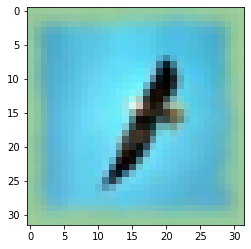

In [12]:
print("original image:")
print("-----------------")
plt.imshow(x[200])

converted image:
-----------------


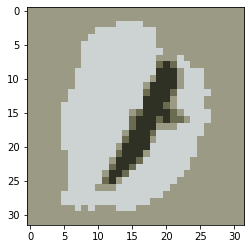

In [13]:
print("converted image:")
print("-----------------")
plt.imshow(x_convert[200])

colorful image:
-----------------


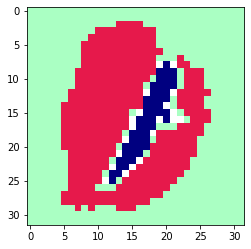

In [14]:
color = np.array([
    [0,0,128],
    [230,25,75],
    [170,255,195],
    [255,255,255]], dtype=np.uint8)

x_colorful = np.array([color[prediction[i]] for i in range(len(pixels))], dtype=np.uint8).reshape(-1, 32, 32, 3)

print("colorful image:")
print("-----------------")
plt.imshow(x_colorful[200])

### e)

In [15]:
from skimage.color import rgb2gray

grayscale image:
-----------------


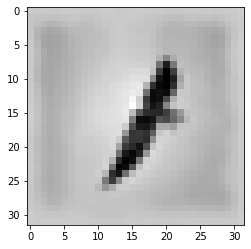

In [16]:
x_gray = np.array([rgb2gray(x[i]) for i in range(len(x))])

print("grayscale image:")
print("-----------------")
plt.imshow(x_gray[200], cmap=plt.cm.gray)

### f)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [18]:
encoder = OneHotEncoder(handle_unknown='ignore')

label_real = [[0], [1], [2], [3]]
encoder.fit(label_real)
label_onehot = encoder.transform(prediction.reshape(-1, 1)).toarray().astype(int).reshape(-1, 32, 32, 4)
xtr, xte, ytr, yte = train_test_split(x_gray.reshape(-1, 32, 32, 1), label_onehot, test_size=0.2)

In [19]:
print("shape of traning data:", xtr.shape, ytr.shape)
print("shape of test data:", xte.shape, yte.shape)

shape of traning data: (4800, 32, 32, 1) (4800, 32, 32, 4)
shape of test data: (1200, 32, 32, 1) (1200, 32, 32, 4)


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1, 1), padding='same', input_shape=(32,32,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

In [25]:
model.compile(optimizer=optimizers.SGD(0.001), loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
________________________________________________

In [26]:
results = model.fit(xtr, ytr, epochs=30, validation_data=(xte, yte))

Epoch 1/30
150/150 [==============================] - 3s 23ms/step - loss: 1.3764 - accuracy: 0.3167 - val_loss: 1.3617 - val_accuracy: 0.3327
Epoch 2/30
150/150 [==============================] - 3s 21ms/step - loss: 1.3518 - accuracy: 0.3382 - val_loss: 1.3446 - val_accuracy: 0.3305
Epoch 3/30
150/150 [==============================] - 3s 21ms/step - loss: 1.3357 - accuracy: 0.3368 - val_loss: 1.3304 - val_accuracy: 0.3296
Epoch 4/30
150/150 [==============================] - 3s 21ms/step - loss: 1.3220 - accuracy: 0.3367 - val_loss: 1.3172 - val_accuracy: 0.3298
Epoch 5/30
150/150 [==============================] - 3s 21ms/step - loss: 1.3085 - accuracy: 0.3395 - val_loss: 1.3031 - val_accuracy: 0.3379
Epoch 6/30
150/150 [==============================] - 3s 21ms/step - loss: 1.2937 - accuracy: 0.3556 - val_loss: 1.2878 - val_accuracy: 0.3752
Epoch 7/30
150/150 [==============================] - 3s 21ms/step - loss: 1.2781 - accuracy: 0.4090 - val_loss: 1.2712 - val_accuracy: 0.4530

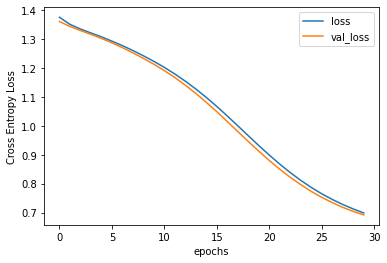

In [27]:
loss = results.history['loss']
val_loss = results.history['val_loss']
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

epochs = np.arange(len(loss))


plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

In [28]:
prediction = model.predict(xte)
prediction = prediction.reshape(xte.shape[0] * 32 * 32, 4)

image_out = []
for index in range(len(prediction)):
    image_out.append([int(color) for color in center[np.argmax(prediction[index])]])
    
image_out = np.reshape(image_out, (-1, 32, 32, 3))

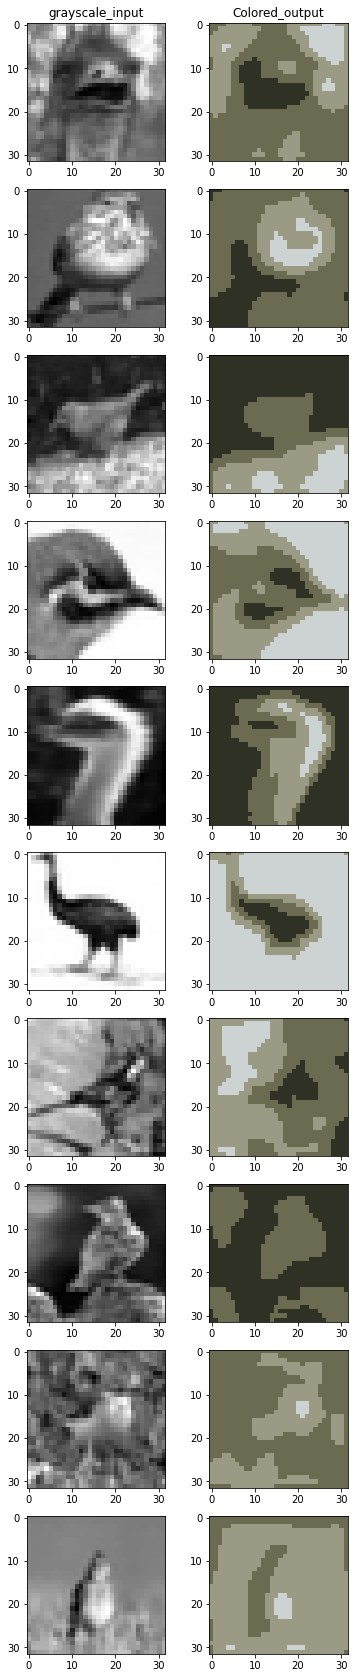

In [36]:
fig, axes = plt.subplots(10, 2, figsize=(6, 30))
ax = axes.ravel()

for i in range(10):
  ax[2*i].imshow(xte.reshape(-1,32,32)[i], cmap=plt.cm.gray)
  ax[2*i+1].imshow(image_out[i])

ax[0].set_title("grayscale_input")
ax[1].set_title("Colored_output")

plt.show()

### g)